## Observations and Insights

## Background
You have complete data from their most recent animal study. In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. 

The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

## Dependencies and starter code

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
print("Mouse", mouse_metadata.columns, mouse_metadata.shape)
print("Results", study_results.columns, study_results.shape)


Mouse Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object') (249, 5)
Results Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object') (1893, 4)


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

In [7]:
# Have a look at the overall dataset
data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_median = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_mean = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_var = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame()
summary['Median'] = tumor_median
summary['Mean'] = tumor_mean
summary['Variance'] = tumor_var
summary['Standard Deviation'] = tumor_std
summary['Standard Error of the Mean'] = tumor_sem

summary

,Median,Mean,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.854632,52.322552,42.351070,6.507770,0.512884
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Number of observations, by treatment regimen')

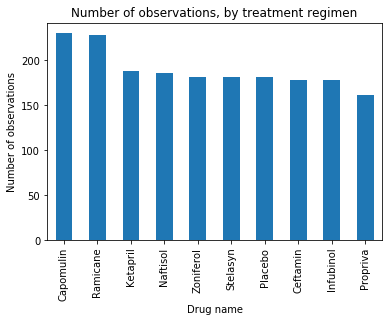

In [89]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen = pd.DataFrame(data['Drug Regimen'].value_counts())
regimen = regimen.rename(columns={"Drug Regimen": "Data points"})
regimen.plot.bar(y='Data points')
plt.legend().set_visible(False)
plt.ylabel("Number of observations")
plt.xlabel("Drug name")
plt.title("Number of observations, by treatment regimen")

Text(0.5, 1.0, 'Number of observations, by treatment regimen')

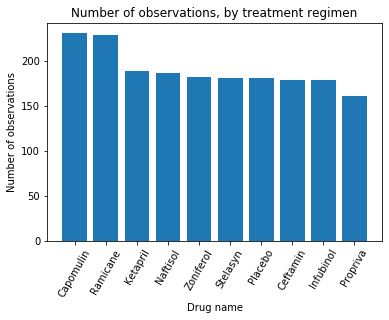

In [92]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(regimen.index, regimen['Data points'])
plt.xticks(rotation=60)
plt.ylabel("Number of observations")
plt.xlabel("Drug name")
plt.title("Number of observations, by treatment regimen")

## Pie plots

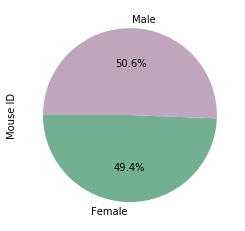

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_genders = data.groupby('Sex')['Mouse ID'].count()
mice_genders.plot.pie(autopct="%1.1f%%", startangle=180, colors=['#73b092', '#bfa5be'])

### FIX THE 'MOUSE ID' -> MOUSE GENDER

([<matplotlib.patches.Wedge at 0x1a1f2abc88>,
 [Text(-0.020992503472586185, -1.0997996703027118, 'Female'),
  Text(0.02099250347258632, 1.0997996703027118, 'Male')],
 [Text(-0.011450456439592464, -0.5998907292560246, '49.4%'),
  Text(0.011450456439592537, 0.5998907292560246, '50.6%')])

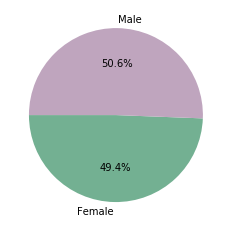

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_genders, labels=mice_genders.index, autopct="%1.1f%%", startangle=180, colors=['#73b092', '#bfa5be'])

## Quartiles, outliers and boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin.
promising = data[(data['Drug Regimen'] == 'Capomulin') | (data['Drug Regimen'] == 'Ramicane') | \
                 (data['Drug Regimen'] == 'Infubinol') | (data['Drug Regimen'] == 'Ceftamin')]

promising_final = promising.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)', 'Timepoint'].max()
promising_df = pd.DataFrame(promising_final)


Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128               45.651331         45
             b742               45.000000         45
             f966               45.000000         20
             g288               46.304003         45
             g316               46.809225         45
...                                   ...        ...
Ramicane     s508               45.000000         45
             u196               47.622816         45
             w678               45.000000          5
             y449               46.378092         15
             z578               45.000000         45

[100 rows x 2 columns]

In [167]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig = plt.figure()
# ax1 = fig.add_subplot(1,3)
# ax1.set_ylabel('Tumor Volume (mm3)')
# ax1.set_title('Ramicane')

# ax2 = fig.add_subplot(2,3)
# ax2.set_title('Capomulin')

# axs[0,1].boxplot(promising_df.loc['Ramicane']['Tumor Volume (mm3)'])
# ax2 = ax.boxplot(promising_df.loc['Capomulin']['Tumor Volume (mm3)'])
# ax3 = ax.boxplot(promising_df.loc['Infubinol']['Tumor Volume (mm3)'])
# ax4 = ax.boxplot(promising_df.loc['Ceftamin']['Tumor Volume (mm3)'])



# promising_df.loc['Ramicane'] Capomulin, Ramicane, Infubinol, and Ceftamin

ValueError: Illegal argument(s) to subplot: (1, 3)

<Figure size 432x288 with 0 Axes>

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen